In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('E:\\DATA SCIENCE\\all csv files\\bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [15]:
df1=df.loc[0:,('age','duration')]
df1

,age,duration
0,59,1042
1,56,1467
2,41,1389
3,55,579
4,54,673
...,...,...
11157,33,257
11158,39,83
11159,32,156
11160,43,9


In [16]:
df_new=df1.iloc[0:150,:]
df_new

,age,duration
0,59,1042
1,56,1467
2,41,1389
3,55,579
4,54,673
...,...,...
145,59,748
146,24,896
147,26,764
148,59,1063


Text(0, 0.5, 'duration')

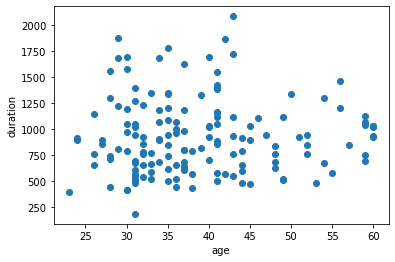

In [17]:
plt.scatter(df_new.age,df_new.duration)
plt.xlabel('age')
plt.ylabel('duration')

In [7]:
from sklearn.cluster import KMeans

In [10]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_new[['age','duration']])
y_predicted

array([1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [11]:
df_new['cluster']=y_predicted
df_new

<ipython-input-11-f3453b1bc5e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster']=y_predicted


,age,job,duration,cluster
0,59,admin.,1042,1
1,56,admin.,1467,2
2,41,technician,1389,2
3,55,services,579,0
4,54,admin.,673,0
...,...,...,...,...
145,59,services,748,0
146,24,blue-collar,896,1
147,26,services,764,0
148,59,retired,1063,1


In [12]:
km.cluster_centers_

array([[  37.73846154,  618.47692308],
       [  40.76666667, 1012.43333333],
       [  37.8       , 1550.24      ]])

In [13]:
df_new1=df_new[df_new.cluster==0]
df_new2=df_new[df_new.cluster==1]
df_new3=df_new[df_new.cluster==2]

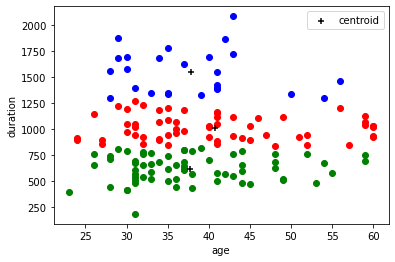

In [14]:
plt.scatter(df_new1.age,df_new1.duration,color='green')
plt.scatter(df_new2.age,df_new2.duration,color='red')
plt.scatter(df_new3.age,df_new3.duration,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='+',label='centroid')
plt.xlabel('age')
plt.ylabel('duration')
plt.legend()

# Elbow Plot

In [51]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['age','duration']])
    sse.append(km.inertia_)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
sse

[19356296.033333324,
 6816979.319528875,
 3023056.7958974363,
 1763654.3979442972,
 1160628.7389817913,
 846689.0250789443,
 660641.1372323639,
 538882.5193342889,
 393898.48522588506]

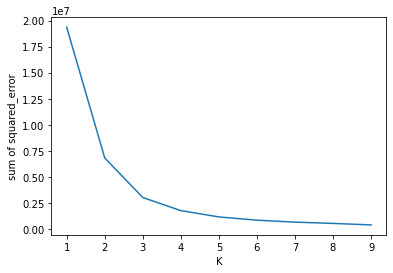

In [53]:
plt.xlabel('K')
plt.ylabel('sum of squared_error')
plt.plot(k_rng,sse)

# Model-2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds=pd.read_csv('E:\\DATA SCIENCE\\all csv files\\bank.csv')
ds

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [29]:
ds1=ds.loc[1000:5000,('age','duration')]
ds1

,age,duration
1000,32,531
1001,32,628
1002,36,1192
1003,45,283
1004,47,454
...,...,...
4996,44,1960
4997,32,615
4998,34,203
4999,42,186


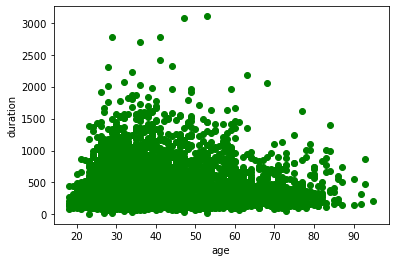

In [30]:
plt.scatter(ds1.age,ds1.duration,color='green')
plt.xlabel('age')
plt.ylabel('duration')
plt.show()

In [31]:
ds1.columns

Index(['age', 'duration'], dtype='object')

<AxesSubplot:xlabel='age', ylabel='duration'>

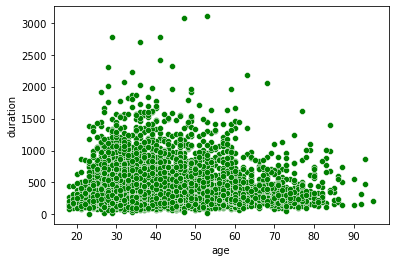

In [32]:
sns.scatterplot(x='age',y='duration',data=ds1,color='green')

# In 3D view....

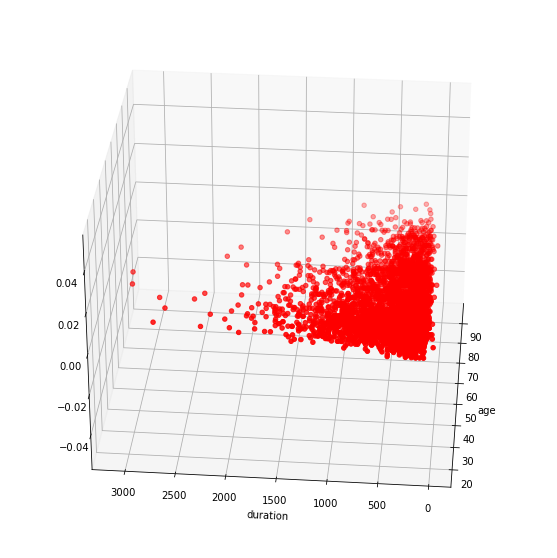

In [33]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds1.age,ds1.duration,color='red')
plt.xlabel('age')
plt.ylabel('duration')
ax.view_init(30,185)
plt.show()

# Elbow plot

So that we could find the K.....

In [34]:
from sklearn.cluster import KMeans
sse1=[] #sum of squre error
k_rnge=range(1,10)
for k in k_rnge:
    km1=KMeans(n_clusters=k)
    km1.fit(ds1[['age','duration']])
    sse1.append(km1.inertia_)

In [35]:
sse1

[475560270.91927016,
 164905592.56837615,
 86225520.51529653,
 54641964.06813667,
 37856431.64853917,
 26845043.145734433,
 20448889.281364545,
 16083039.351455308,
 13169885.229256624]

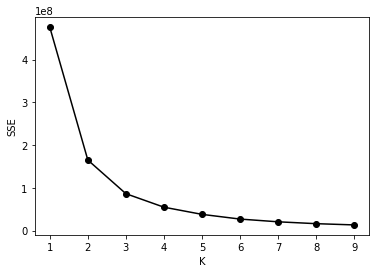

In [36]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rnge,sse1,'-o',color='black')

So we clearly looking on above graph that our K=3....so our clusters will be also 3.

# Shilhoutte Score

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, silhoutette_score is better.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

Lets calculate the silhouette score of the model we just built:

In [37]:
from sklearn.metrics import silhouette_score
kmc=KMeans(n_clusters=3)
kmc.fit(ds1)
silhouette_score(ds1,kmc.labels_)*100

61.933445600458214

In [38]:
km1=KMeans(n_clusters=3)
y_predict=km1.fit_predict(ds1)
y_predict

array([1, 1, 2, ..., 0, 0, 0])

In [39]:
ds1['Cluster']=y_predict
ds1

,age,duration,Cluster
1000,32,531,1
1001,32,628,1
1002,36,1192,2
1003,45,283,0
1004,47,454,0
...,...,...,...
4996,44,1960,2
4997,32,615,1
4998,34,203,0
4999,42,186,0


In [40]:
ds1['Cluster'].value_counts()

0    2576
1    1115
2     310
Name: Cluster, dtype: int64

In [41]:
km1.cluster_centers_

array([[  42.22709627,  261.15062112],
       [  41.92017937,  679.55695067],
       [  40.32258065, 1328.33548387]])

In [42]:
dsa=ds1[ds1.Cluster==0]
dsb=ds1[ds1.Cluster==1]
dsc=ds1[ds1.Cluster==2]

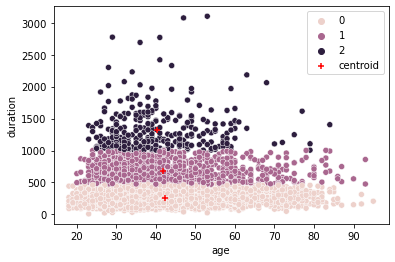

In [43]:
sns.scatterplot(x='age',y='duration',data=ds1,hue='Cluster')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='red',marker='+',label='centroid')
plt.legend()

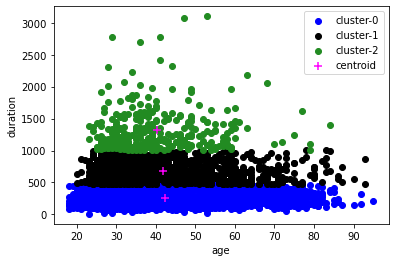

In [44]:
plt.scatter(dsa.age,dsa.duration,color='blue',label='cluster-0')
plt.scatter(dsb.age,dsb.duration,color='black',label='cluster-1')
plt.scatter(dsc.age,dsc.duration,color='forestgreen',label='cluster-2')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='magenta',marker='+',
            s=80,label='centroid')
plt.xlabel('age')
plt.ylabel('duration')
plt.legend()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
df=pd.read_csv('E:\\DATA SCIENCE\\all csv files\\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

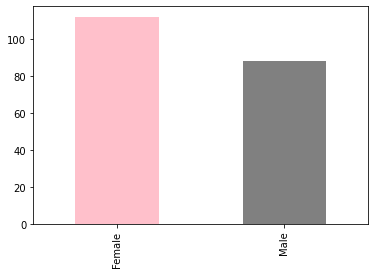

In [10]:
df.Gender.value_counts().plot(kind='bar',color=['pink','grey'])
plt.show()

so here we can say that women do much shoping than men.

<AxesSubplot:xlabel='Age', ylabel='Count'>

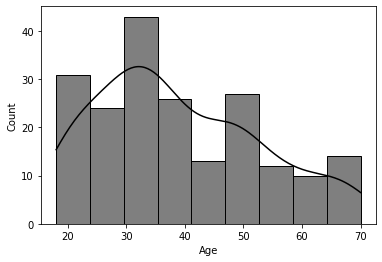

In [11]:
sns.histplot(df['Age'],color='black',kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

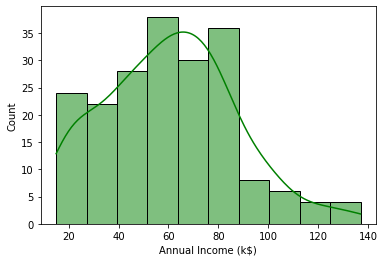

In [12]:
sns.histplot(df['Annual Income (k$)'],color='green',kde=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

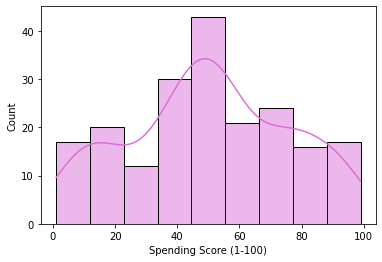

In [13]:
sns.histplot(df['Spending Score (1-100)'],color='orchid',kde=True)

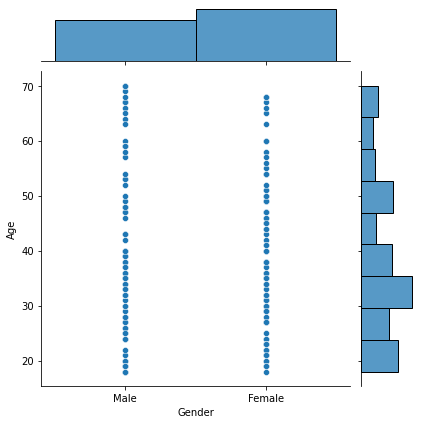

In [14]:
sns.jointplot(x='Gender',y='Age',data=df)

Here showing clearly that male has more age than female but female has more no. and we can target on that.

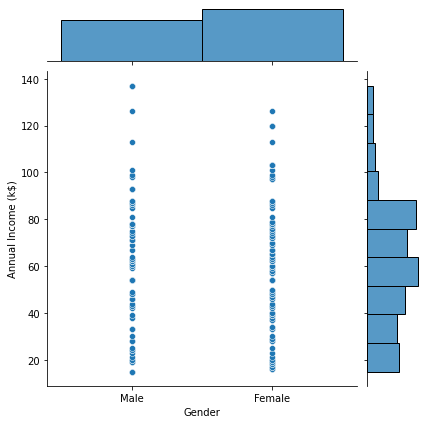

In [15]:
sns.jointplot(x='Gender',y='Annual Income (k$)',data=df)

Here we can see that men have more annual income than women we need to pay attention on that so that they could expend.

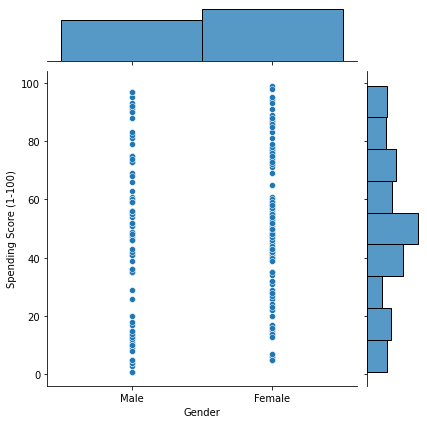

In [16]:
sns.jointplot(x='Gender',y='Spending Score (1-100)',data=df)

here we can see that both have almost the same spending score. so we need to target male as well as female.

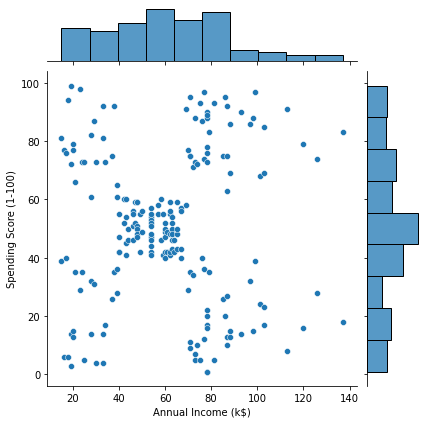

In [17]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

By this illustraion we can see clearly that diffrent kind of annual income person have different spending score.

# Label Encoding
becose we have one categorical parameter as Gender column.

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [20]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [21]:
col_names=['Age','Annual Income (k$)','Spending Score (1-100)']
features=df[col_names]
scaled_features=scale.fit_transform(features)
scaled_df=pd.DataFrame(scaled_features,columns=col_names)
scaled_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [22]:
new_df=scaled_df.join(df.Gender)
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [23]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

# Elbow plot
to know the value of K.......

In [24]:
from sklearn.cluster import KMeans
sse=[] #sum of squre error
k_range=range(1,10)
for k in k_range:
    kmc=KMeans(n_clusters=k)
    kmc.fit(new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])
    sse.append(kmc.inertia_)

In [25]:
sse

[649.2800000000002,
 438.5224115567773,
 344.4341455934711,
 254.28290726083466,
 216.85928292083833,
 181.9514362434146,
 164.7671666644516,
 150.99137433164256,
 138.30885534287327]

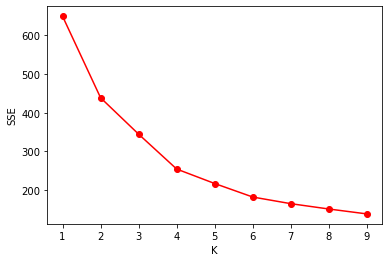

In [41]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse,'-o',color='red')

Here we can see clearly that our Elbow inclined in 4 that implies our K=4. 

# Silhouette_score
A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

Lets calculate the silhouette score of the model we just built:

In [27]:
from sklearn.metrics import silhouette_score
# First, build a model with 4 clusters
kmeans = KMeans(n_jobs= -1, n_clusters = 4, init='k-means++')
kmeans.fit(new_df)
# Now, print the silhouette score of this model
print(silhouette_score(new_df, kmeans.labels_, metric='euclidean'))

0.35027020434653977


The silhouette score of this model is about 0.35.

This isn't a bad model, but we can do better and try getting higher cluster separation.

Before we try doing that, lets visualize the clusters we just built to get an idea of how well the model is doing.

In [28]:
kmc=KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(new_df.iloc[:,0:])
clusters

array([3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 3, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [29]:
new_df['label']=clusters
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender,label
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,3
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,2
196,0.441365,2.497807,-0.861839,0,0
197,-0.491602,2.497807,0.923953,1,2
198,-0.491602,2.917671,-1.250054,1,0


In [30]:
new_df.label.value_counts()

1    65
3    57
2    40
0    38
Name: label, dtype: int64

In [31]:
new_df.label.value_counts().values

array([65, 57, 40, 38], dtype=int64)

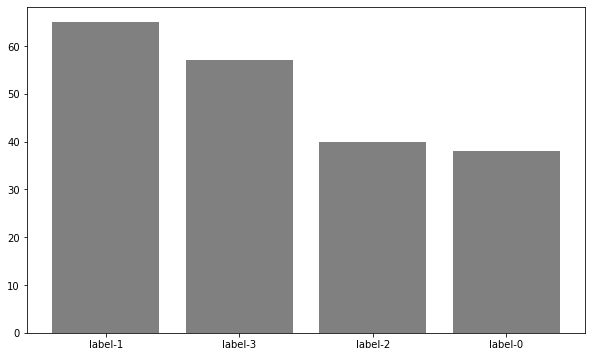

In [32]:
plt.figure(figsize=(10,6))
plt.bar(list(('label-1','label-3','label-2','label-0')),list((new_df.label.value_counts().values)),color='grey')
plt.show()

In [33]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender',
       'label'],
      dtype='object')

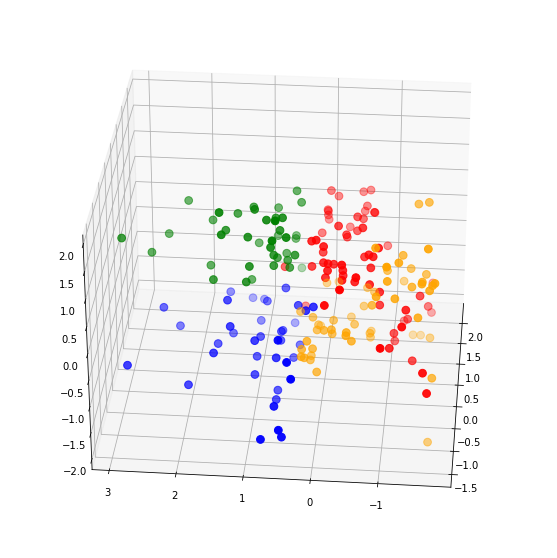

In [34]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df.Age[new_df.label == 0], new_df["Annual Income (k$)"][new_df.label == 0], new_df["Spending Score (1-100)"][new_df.label == 0], c='blue', s=60)
ax.scatter(new_df.Age[new_df.label == 1], new_df["Annual Income (k$)"][new_df.label == 1], new_df["Spending Score (1-100)"][new_df.label == 1], c='red', s=60)
ax.scatter(new_df.Age[new_df.label == 2], new_df["Annual Income (k$)"][new_df.label == 2], new_df["Spending Score (1-100)"][new_df.label == 2], c='green', s=60)
ax.scatter(new_df.Age[new_df.label == 3], new_df["Annual Income (k$)"][new_df.label == 3], new_df["Spending Score (1-100)"][new_df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.show()

From the above diagram, we can see that cluster separation isn't too great.

The red points are mixed with the blue, and the green are overlapping the yellow.

This, along with the silhouette score shows us that the model isn't performing too well.

Now, lets create a new model that has better cluster separability than this one.

# Building clustering model-2
For this model, lets do some feature selection.

We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

We can select a subset of these variables and include them into the K-means model.

Now, lets run PCA on the dataset:

([<matplotlib.axis.XTick at 0xdd19c10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

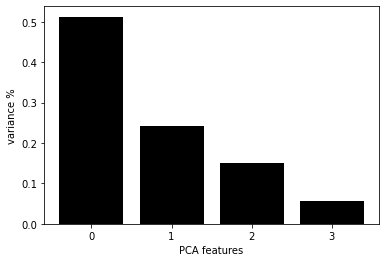

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(new_df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [36]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3
0,-1.825189,-1.404345,1.364737,0.624900
1,-2.564408,-0.967860,0.147151,0.508677
2,-1.175881,-1.785002,2.191705,-0.254464
3,-2.438435,-1.038442,0.153350,-0.452451
4,-1.447305,-1.611704,0.713474,-0.309245
...,...,...,...,...
195,-0.463049,2.379316,-0.652398,-0.350914
196,2.291226,2.032304,0.212280,-0.446602
197,-0.388369,2.607497,-0.377674,0.646906
198,2.166823,2.601340,1.135976,0.536286


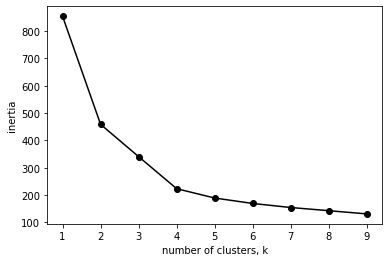

In [40]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,0:])
    inertias.append(model.inertia_)

plt.plot(ks, inertias,'-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [42]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,0:])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,0:], model.labels_, metric='euclidean'))

0.45158529824107846


The silhouette score of this model is 0.45, which is better than the previous model we created.

In [43]:
model = KMeans(n_clusters=4)
clusters = model.fit_predict(PCA_components.iloc[:,0:])
new_df["label"] = clusters
newdf=pd.DataFrame(new_df)
newdf

,Age,Annual Income (k$),Spending Score (1-100),Gender,label
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,3
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,1
196,0.441365,2.497807,-0.861839,0,0
197,-0.491602,2.497807,0.923953,1,1
198,-0.491602,2.917671,-1.250054,1,0


# We can visualize the clusters for this model just like we did earlier:

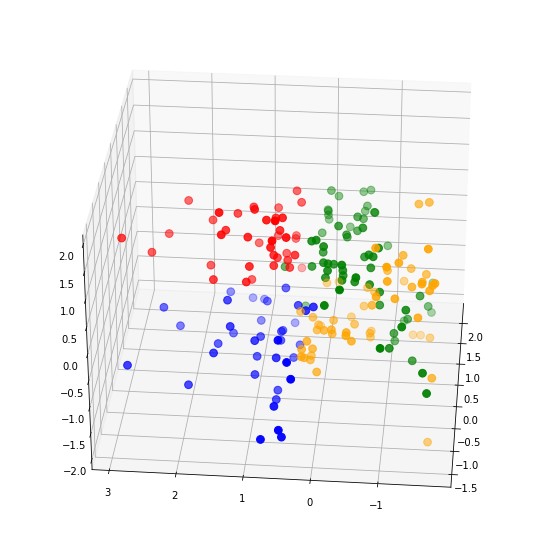

In [44]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.show()

In [45]:
# map back clusters to dataframe
pred = model.predict(PCA_components.iloc[:,0:])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,3
3,0,23,16,77,3
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,0
197,1,32,126,74,1
198,1,32,137,18,0


Notice that each row in the data frame is now assigned to a cluster.

In [47]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.500000,39.368421,86.500000,19.578947
1,1,0.450000,32.875000,86.100000,81.525000
2,2,0.430769,53.984615,47.707692,39.969231
3,3,0.403509,25.438596,40.000000,60.298246


<AxesSubplot:xlabel='cluster', ylabel='Age'>

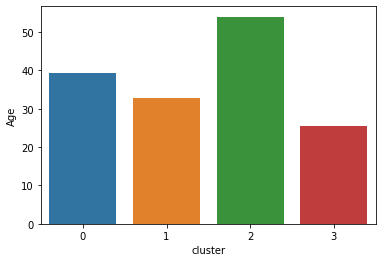

In [49]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

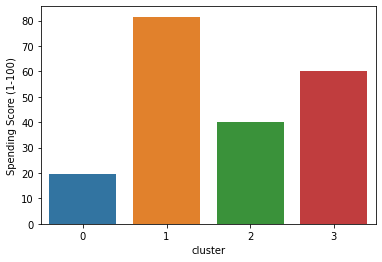

In [50]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

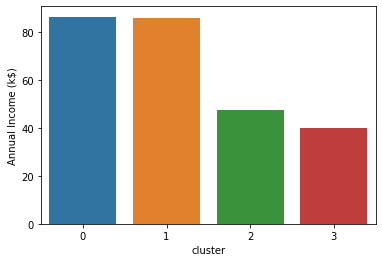

In [51]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

# Gender Breakdown

In [53]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2

Gender
cluster Gender        
0       0           19
        1           19
1       0           22
        1           18
2       0           37
        1           28
3       0           34
        1           23